# InClass exercises (randomization and bootstrapping)


## First start by importing the packages you'll need. 
* Numpy, scipy, and matplotlib


In [1]:
import numpy as np
from scipy import stats  # has t-tests and other stats stuff...
import matplotlib.pyplot as plt

## Part I: Start with some data. This is a slightly modified part of the Anscombe data set
* First plot it
* Then compute the correlation coeffecient that relates the two arrays
* Then the t-value and p-value associated with the correlation. 

In [2]:
d1 = np.array([8.1, 8.01, 7.8, 7.85, 8.21, 8.11, 7.95, 12.5, 8.05, 7.98, 8.13])
d2 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 19, 5.56, 7.91, 6.89])

## Ok - now scatterplot the data

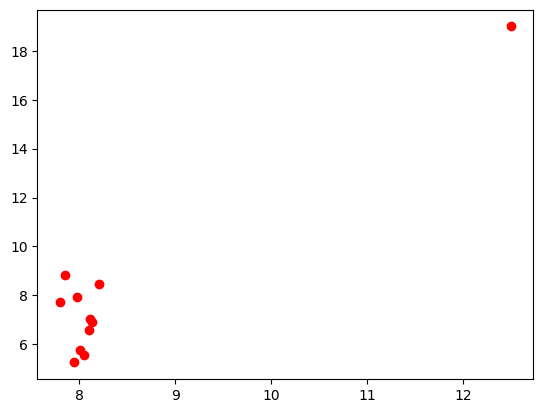

In [3]:
# first plot the data! always do this first
plt.scatter(d1,d2,color='r',marker='o')
plt.show()

## Based on this plot, what do you think is going to happen when we compare the output from a parametric test and a radomization test?
* First compute parametric correlation coef and p-value...

In [4]:
# parametric correlation coeffecient
N = len(d1)

parametric_r, parametric_p = stats.pearsonr(d1, d2)

print('Correlation coef: ', parametric_r)
print('P value: ', parametric_p)

Correlation coef:  0.9440640224607472
P value:  1.2498961305090947e-05


## Now use randomization testing to put a (slightly) better p-value on the data...
* Run 10000 iterations of the randomization test to evalute how likely your correltation value is under the assumption that your condition label makes no difference (ie. that your manipulation is meaningless)
* On each iteration randomly decide if each data point is assigned to one condition or the other
    * One easy way to do this is to flip a coin to determine assignment of each data point (e.g. `if np.random.rand() < .5` then assign a data point to condition 1, otherwise to condition 2
* then re-compute correlation on each iteration
* then compare the distribution of p values under the null to your obtained p-value

In [5]:
# figure out how many times we want to run the randomization test...
num_rands = 10000
null_r = np.zeros(num_rands)
tmp0 = np.zeros(N)
tmp1 = np.zeros(N)

# start a loop over randomization iterations
for i in np.arange(num_rands):
    
    # write this out explicitly for clarity - randomly assigning numbers from d1 or d2
    # i.e. condition doesn't matter. 
    for j in np.arange(N):   
        
        if np.random.rand(1) < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else:
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]

    # then correlate the two randomized data vectors...compute tvalues
    null_r[i], _ = stats.pearsonr(tmp0, tmp1)

# compute the p-value of our real t-score (t_val) vs our radomized distribution
null_p = 2 * (np.sum(null_r > parametric_r) / num_rands)

print('Randomization-based p-value: ', np.round(null_p,4), ' Parametric P-value: ', np.round(parametric_p,4))

Randomization-based p-value:  0.0216  Parametric P-value:  0.0


## Would you still want to publish these data? Why does label swapping here still result in such a low p-value when the correlation is visibly so dubious? Why would bootstrapping be more appropriate here? Give it a try to see what happens...
* Resample the data **with replacement** (10000 times or whatever)
* On each bootstrap iteration recompute your correlation
* Then compute confidence intervals...


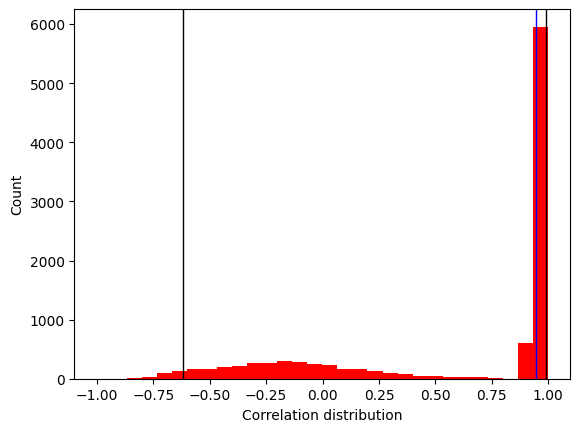

In [6]:
# number of bootstraps
num_bootstraps = 10000
corr = np.zeros(num_bootstraps)
p = np.zeros(num_bootstraps)
N = len(d1)

for i in np.arange(num_bootstraps):
    
    # with replacement generate a sample number from 0:N and do that N times
    index = np.random.randint(N, size=N)

    # use that to pull data from each of our arrays
    tmp1 = d1[index]
    tmp2 = d2[index]
    
    # compute correlation
    corr[i], p[i] = stats.pearsonr(tmp1,tmp2)
    
# then compute 95% CIs based on percentiles 
CIs = np.percentile(corr, [2.5, 97.5])

# histogram it
plt.hist(corr, color='r', alpha=1, bins=30)
plt.axvline(parametric_r, color='b', linewidth=1)
plt.axvline(CIs[0], color='k', linewidth=1)
plt.axvline(CIs[1], color='k', linewidth=1)
plt.xlabel('Correlation distribution')
plt.ylabel('Count')
plt.show()